In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'A':[1,2,3,4,5],'B':[4,5,6,7,8]})

In [3]:
df

,A,B
0,1,4
1,2,5
2,3,6
3,4,7
4,5,8


### apply 

In [8]:
df.A.apply(lambda x: x+2)

0    3
1    4
2    5
3    6
4    7
Name: A, dtype: int64

In [9]:
df.B.apply(lambda x:x*2)

0     8
1    10
2    12
3    14
4    16
Name: B, dtype: int64

In [11]:
df.A.map(lambda x: x+2)

0    3
1    4
2    5
3    6
4    7
Name: A, dtype: int64

In [13]:
loan = pd.read_csv('Data/loan.csv')

C:\Users\awant\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [17]:
loan.loan_amnt.min()

500.0

In [18]:
loan.loan_amnt.max()

35000.0

In [19]:
def f(x):
    if x < 1000:
        return 'LOW'
    elif x < 10000:
        return 'MEDIUM'
    else:
        return 'HIGH'

In [26]:
loan['loan_amt_cat'] = loan.loan_amnt.map(f)
#loan.loan_amnt.apply(f)

In [27]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_amt_cat
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM


#### When grade B, find diff between loan_amnt & funded_amnt

In [28]:
def f(d):
    if d['grade'] == 'B':
        return d['loan_amnt'] - d['funded_amnt']
    else:
        return d['loan_amnt']
loan['GradeBLoan'] = loan.apply(f,axis=1)

In [29]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,loan_amt_cat,GradeBLoan
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM,0.0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM,2500.0
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM,2400.0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HIGH,10000.0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM,0.0


In [30]:
#df['loan_amnt'] - df['funded_amnt']

In [33]:
df.applymap(lambda x: x/255.0)

,A,B
0,0.003922,0.015686
1,0.007843,0.019608
2,0.011765,0.023529
3,0.015686,0.027451
4,0.019608,0.031373


In [35]:
from sklearn.datasets import load_iris

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
iris = load_iris()

In [39]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [41]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [42]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [45]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [46]:
df1 = pd.DataFrame({'Type':iris.target})

In [49]:
df2 = pd.concat([df,df1],axis=1)

In [50]:
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Text(0,0.5,'Sepal Width')

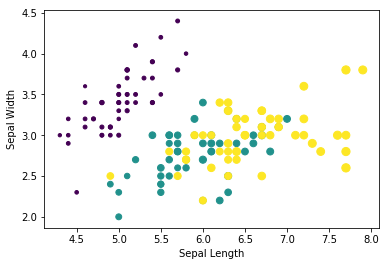

In [55]:
plt.scatter(x=df2['sepal length (cm)'], y=df2['sepal width (cm)'],s=df2['petal length (cm)']*10, c=df2.Type)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

In [56]:
df= pd.DataFrame({'X':[1,2,3,4]})

In [59]:
df['X3'] = df.X * df.X * df.X

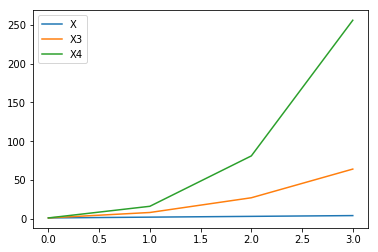

In [63]:
df['X4'] = df.X**4
df.plot()

In [64]:
df

,X,X3,X4
0,1,1,1
1,2,8,16
2,3,27,81
3,4,64,256
